In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [2]:
df_HFC = pd.read_excel('data/HighTurnover/HFC.xlsx', index_col=0)
y = pd.read_excel('data/Returns/Ret_Var.xlsx', index_col=0)

In [3]:
df_ind_mom = pd.read_excel('data/HighTurnover/Ind_Mom.xlsx', index_col=0)

In [4]:
df_irr = pd.read_excel('data/HighTurnover/IRR.xlsx', index_col=0)

In [5]:
predictors = [df_HFC, df_ind_mom, df_irr]
names=["HFC","ind_mom","irr"]

In [6]:
predictors_stacked = []
for i in range(len(predictors)):
    df_filled = predictors[i].fillna(predictors[i].median(axis=0))
    df_filled[pd.isna(y)] = np.NaN
    df_stack = df_filled.stack().dropna()
    df_stack.name = names[i]
    df_stack = df_stack.reset_index()
    predictors_stacked.append(df_stack)

In [7]:
predictors_stacked[0].shape

(2187349, 3)

In [8]:
res = predictors_stacked[0]
for i in range(1,len(predictors)):
    res = pd.merge(res, predictors_stacked[i], how="left", left_on=["Permno", "level_1"], right_on=["Permno", "level_1"])

In [9]:
res.head()

,Permno,level_1,HFC,ind_mom,irr
0,10001,198601,50.013924,7.0,50.013924
1,10001,198602,72.123043,8.0,29.991761
2,10001,198603,60.641479,3.0,37.292743
3,10001,198604,49.358632,3.0,48.717263
4,10001,198605,29.925651,2.0,66.861391


In [10]:
y_stack = y.stack().dropna()
y_stack.name = "return"
y_stack = y_stack.reset_index()
y_stack.head()

,Permno,level_1,return
0,10001,198601,0.000000
1,10001,198602,0.020408
2,10001,198603,0.025200
3,10001,198604,0.009901
4,10001,198605,-0.009804


In [22]:
print(res.shape)
print(y_stack.shape)

(2187349, 5)
(2187349, 3)


In [129]:
x_train, x_test = np.split(res.to_numpy()[:,2:], [1457474])
y_train, y_test = np.split(y_stack.to_numpy()[:,2:], [1457474])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1457474, 3)
(1457474, 1)
(729875, 3)
(729875, 1)


In [130]:
reg = LinearRegression().fit(x_train, y_train)
print(mean_squared_error(y_test, reg.predict(x_test)))
print(r2_score(y_test, reg.predict(x_test)))

0.02784050323449214
0.0009060372235681902


In [54]:
MSEs = []
R2s = []
for i in range(198700,201900,100):
    x_train = res[res["level_1"] < i].to_numpy()[:,2:]
    y_train = y_stack[y_stack["level_1"] < i].to_numpy()[:,2:]
    x_test = res[(res["level_1"] >= i) & (res["level_1"] <= i + 100)].to_numpy()[:,2:]
    y_test = y_stack[(y_stack["level_1"] >= i) & (y_stack["level_1"] <= i + 100)].to_numpy()[:,2:]
    reg = LinearRegression().fit(x_train, y_train)
    MSEs.append(mean_squared_error(y_test, reg.predict(x_test)))
    R2s.append(r2_score(y_test, reg.predict(x_test)))

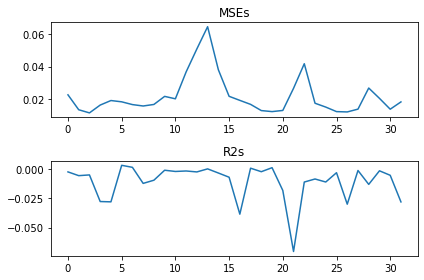

In [55]:
plt.subplot(2,1,1)
plt.plot(MSEs)
plt.title("MSEs")

plt.subplot(2,1,2)
plt.plot(R2s)
plt.title("R2s")

plt.tight_layout()

In [58]:
print(np.mean(MSEs))
print(np.mean(R2s))

0.021916820900006177
-0.010579624620879049
